<a href="https://colab.research.google.com/github/sturu1/Mon-AM/blob/master/2020_07_17_%EC%98%A4%EC%A0%84%EC%88%98%EC%97%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion MNIST 데이터셋을 이용하여 분류문제로 학습 후 Latent Vactor를 이용하여 T-SNE를 구하여라

1. 지난 시간에 학습한 모델 그대로 사용
2. 9번째 레이어의 Latent Vactor를 사용
3. Perplecity 15, 30, 50에 대하여 구해보기


In [11]:
#지난 시간에 학습한 모델 그대로 사용
import tensorflow as tf
import matplotlib.pyplot as plt

(train_X, train_Y), (test_X, test_Y) = tf.keras.datasets.fashion_mnist.load_data() #Fashion MNIST 데이터셋을 이용

train_X = train_X/255.0
test_X = test_X/255.0

print(train_Y[0])

train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(input_shape=(28, 28, 1), kernel_size=(3, 3), filters = 32, padding='same', activation='relu'),
                             tf.keras.layers.Conv2D(kernel_size=(3, 3), filters = 64, padding='same', activation='relu'),
                             tf.keras.layers.MaxPool2D(strides=(2, 2)),
                             tf.keras.layers.Dropout(rate=0.5),
                             tf.keras.layers.Conv2D(kernel_size=(3, 3),filters=128, padding='same', activation='relu'),
                             tf.keras.layers.Conv2D(kernel_size=(3, 3),filters=256, padding='valid', activation='relu'),
                             tf.keras.layers.MaxPool2D(strides=(2, 2)),
                             tf.keras.layers.Dropout(rate=0.5),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(units=512, activation='relu'), #이 레이어 사용하는것
                             tf.keras.layers.Dropout(rate=0.5),
                             tf.keras.layers.Dense(units=256, activation='relu'),
                             tf.keras.layers.Dropout(rate=0.5),
                             tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

history = model.fit(train_X, train_Y, epochs=20, validation_split=0.25)


4423680/4422102 [==============================] - 0s 0us/step
9
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 256)       295168    
_______________________________________________________

# 이 코드를 밑에 코드로 쉽게 변경

import numpy as np

from sklearn.manifold import TSNE

latent_vector_model = tf.keras.Model(inputs=model.input, outputs=model.layers[9].output)
#하나의 데이터 당 64차원 latent벡터를 얻을 수 있음
latent_vector = latent_vector_model.predict(train_X)


tsne = TSNE(n_components=2, learning_rate=100, perplexity=15, random_state=0)
tsne_vector = tsne.fit_transform(latent_vector[:5000])

cmap = plt.get_cmap('rainbow', 10)
fig = plt.scatter(tsne_vector[:,0], tsne_vector[:,1], marker='.', c=train_Y[:5000], cmap=cmap)
cb = plt.colorbar(fig, ticks=range(10))
n_clusters = 10
tick_locs = (np.arange(n_clusters) + 0.5)*(n_clusters-1)/n_clusters

cb.set_ticks(tick_locs)
cb.set_ticklabels(range(10))

plt.show()

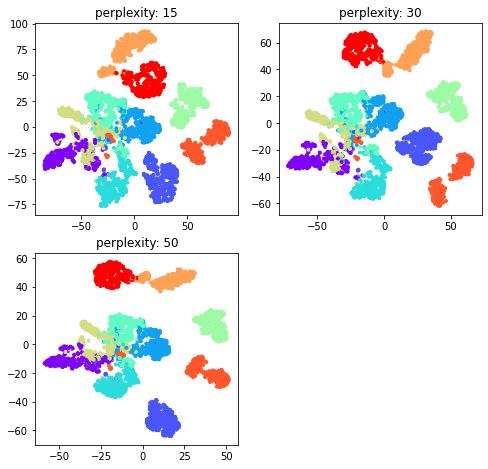

In [12]:
import numpy as np
from sklearn.manifold import TSNE

perplexities = [15, 30, 50]
plt.figure(figsize=(8,12))

latent_vector_model = tf.keras.Model(inputs=model.input, outputs=model.layers[9].output)
#하나의 데이터 당 64차원 latent벡터를 얻을 수 있음
latent_vector = latent_vector_model.predict(train_X)

for c in range(3):
  tsne = TSNE(n_components=2, learning_rate=100, perplexity=perplexities[c], random_state=0)
  tsne_vector = tsne.fit_transform(latent_vector[:5000])

  plt.subplot(3, 2, c+1)
  plt.scatter(tsne_vector[:,0], tsne_vector[:,1], marker='.', c=train_Y[:5000], cmap='rainbow')
  plt.title('perplexity: {0}'.format(perplexities[c]))

plt.show()
#353쪽 참고하기